## DATA SCIENCE FINAL PROJECT

In [9]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from prettytable import PrettyTable
import xgboost as xgb
from IPython.display import display
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import time
from matplotlib import pyplot
from sklearn.dummy import DummyRegressor
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
 

%matplotlib inline

### Loading the Development and Evaluation set


In [10]:
df_dev = pd.read_csv('DSL_Winter_Project_2024/DSL_Winter_Project_2024/development.csv')
df_dev.index.rename('Id', inplace=True)
df_eval = pd.read_csv('DSL_Winter_Project_2024/DSL_Winter_Project_2024/evaluation.csv', index_col=0)

display(df_dev.head())
display(df_eval.head())


,x,y,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
Id,,,,,,,,,,,,,,,,,,,,,
0,200.0,200.0,4.066907,-17.690173,2.847932,0.600000,2.007042,5.409161,-17.721210,4.538778,...,607.109118,-36.282996,583.899899,72.373094,0.374498,614.916861,-39.848523,591.852768,72.331028,0.405595
1,200.0,200.0,5.916801,-4.717111,5.792778,79.765174,1.564535,4.414289,-4.736827,3.720435,...,630.348007,-39.715988,580.042799,71.029155,0.403258,624.950701,-41.266681,586.569646,71.089058,0.405890
2,200.0,200.0,4.286652,-5.316132,2.356390,74.600000,1.404622,4.567191,-5.985437,3.490490,...,613.880342,-40.679678,580.407491,71.892264,0.568777,596.437125,-42.712286,574.091695,71.943934,0.498019
3,200.0,200.0,4.003635,-4.617459,2.189005,43.000000,1.512162,5.019058,-4.229949,6.786200,...,600.714957,-43.206601,579.882635,72.357388,0.255483,591.763739,-50.681940,584.099483,72.333282,0.336454
4,200.0,200.0,4.448146,-4.848743,3.997002,196.667482,1.101113,3.250262,-5.783587,2.449456,...,609.723785,-43.570892,590.156125,71.249130,0.413855,606.917023,-49.923819,584.316142,71.242904,0.293824


,pmax[0],negpmax[0],area[0],tmax[0],rms[0],pmax[1],negpmax[1],area[1],tmax[1],rms[1],...,pmax[16],negpmax[16],area[16],tmax[16],rms[16],pmax[17],negpmax[17],area[17],tmax[17],rms[17]
Id,,,,,,,,,,,,,,,,,,,,,
0,4.400616,-4.257770,2.860212,176.600000,1.562814,8.738040,-3.598874,5.554105,70.800000,0.729175,...,614.621212,-42.232574,583.237137,70.693530,0.861022,608.931417,-42.728827,568.019556,70.755552,0.328075
1,5.599571,-2.974570,9.400537,90.677386,1.129626,23.460358,-20.616669,17.998419,72.800000,1.258335,...,520.333440,-36.986118,550.540448,72.781390,0.259205,613.671695,-44.449564,586.292097,72.900695,0.401326
2,3.731995,-5.662292,1.930957,155.200000,0.921757,4.837952,-7.224267,3.289124,67.057395,0.793541,...,607.642389,-46.680069,582.825835,71.407320,0.552691,608.996069,-45.877765,589.520958,71.406020,0.343592
3,5.657729,-4.600342,5.593030,30.463179,1.269390,87.293692,-45.786813,38.422989,71.800000,0.733773,...,596.094911,-48.241263,577.835129,72.011986,0.361220,612.500144,-49.572583,583.795426,72.066338,0.429650
4,3.716666,-4.583796,1.946927,33.600000,1.082743,9.593125,-5.374179,7.767408,72.414459,1.572473,...,620.793628,-37.618567,599.834735,72.251813,0.390639,621.557649,-45.189832,600.988676,72.151243,0.358549


Check for missing values

In [ ]:
# check for missing values in the development set  
dev_null = df_dev.isnull().sum()
display('Dev_set: missing values in each feature:')
display(dev_null) # There are no missing values in the data

# check for missing values in the evaluation set   
eval_null = df_eval.isnull().sum()
display('Eval_set: missing values in each feature:')
display(eval_null) # There are no missing values in the data

## PREPROCESSING

### Visualization of the data

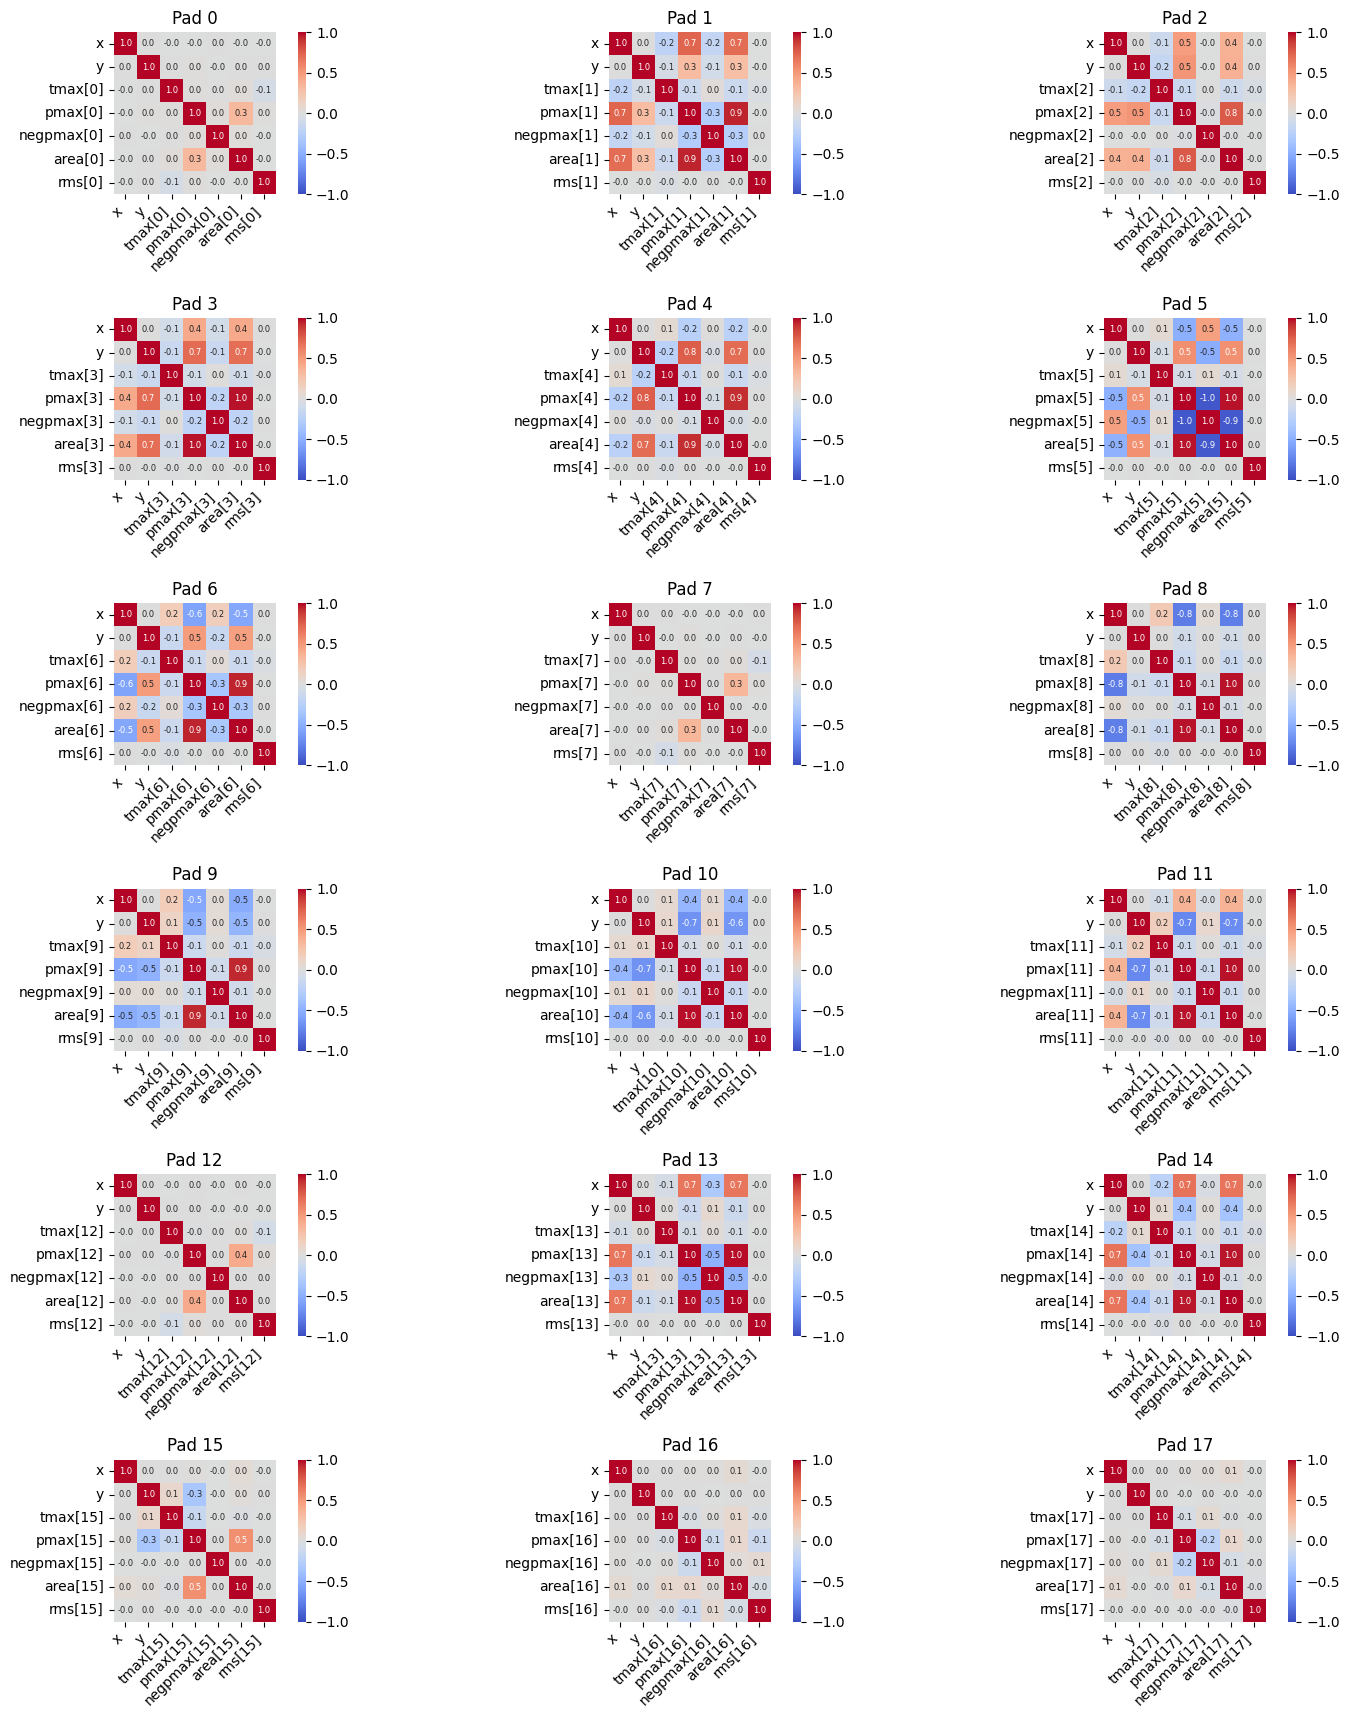

In [11]:
# CORRELATION MATRICES
# Check feature relevance to the targets through correlation matrix

fig, axes = plt.subplots(6, 3, figsize=(15, 18))
fig.suptitle('Correlation Matrices', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    selected_columns = ['x', 'y', f'tmax[{i}]', f'pmax[{i}]', f'negpmax[{i}]', f'area[{i}]', f'rms[{i}]']

    # Select the columns
    correlation_matrix = df_dev.loc[:, selected_columns].corr()

    # heatmap for the correlation matrix
    sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1, ax=ax, square=True, annot=True, annot_kws={"size": 6}, fmt=".1f")
    ax.set_title(f'Pad {i}', fontsize=12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

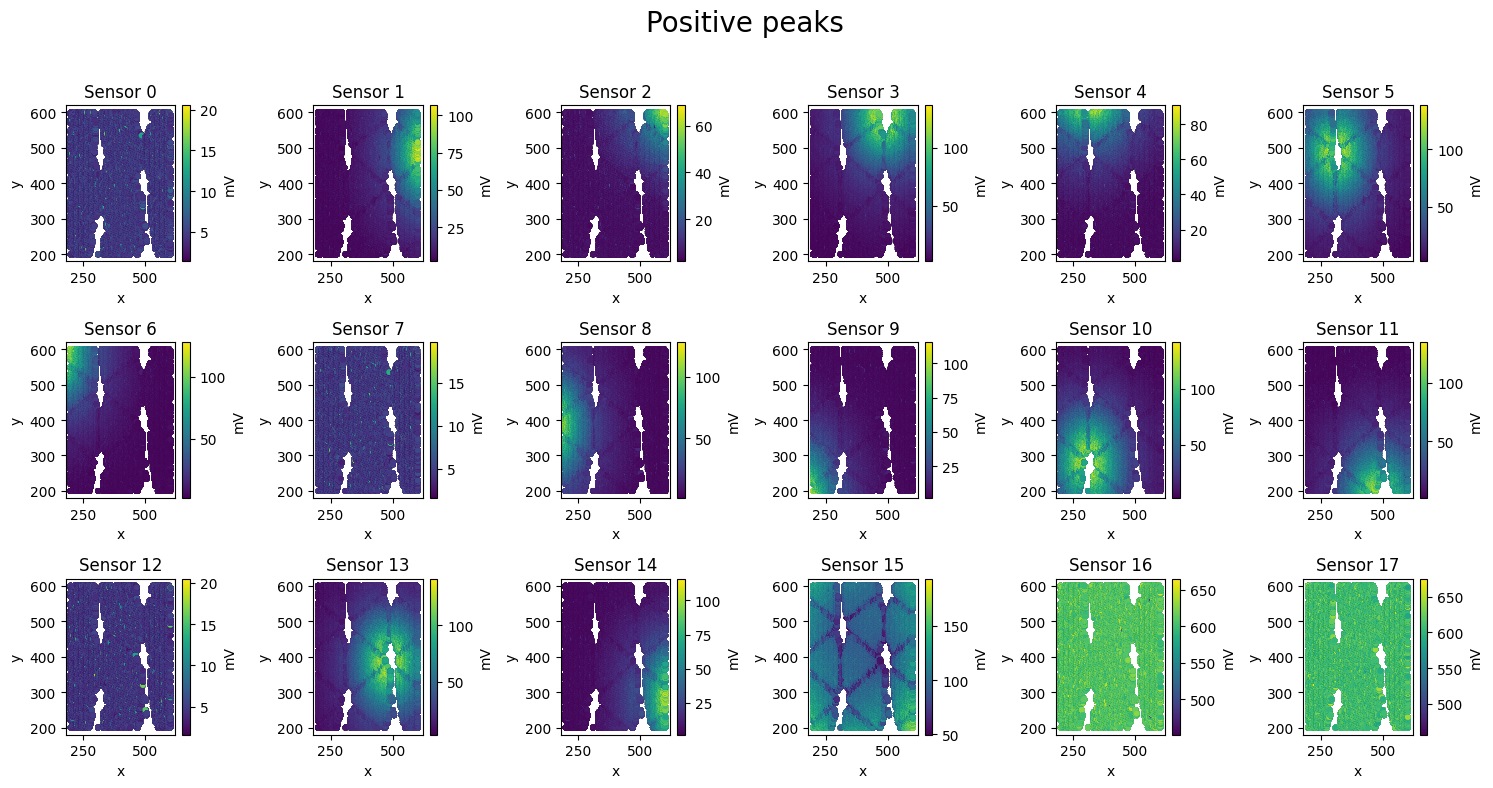

In [16]:
# SENSORS HEATMAP

fig, axes = plt.subplots(3, 6, figsize=(15, 8))
fig.suptitle('Positive peaks', fontsize=20)

for i, ax in enumerate(axes.flatten()):
    sc = ax.scatter(df_dev['x'], df_dev['y'], c=df_dev[f'pmax[{i}]'], cmap='viridis', marker='o', s=10)

    cbar = plt.colorbar(sc, ax=ax)
    cbar.set_label('mV')
    ax.set_title(f'Pad {i}', fontsize=12)
    ax.set_xlabel('x')
    ax.set_ylabel('y')


plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

#fig.savefig("Figure2.pdf", bbox_inches='tight')

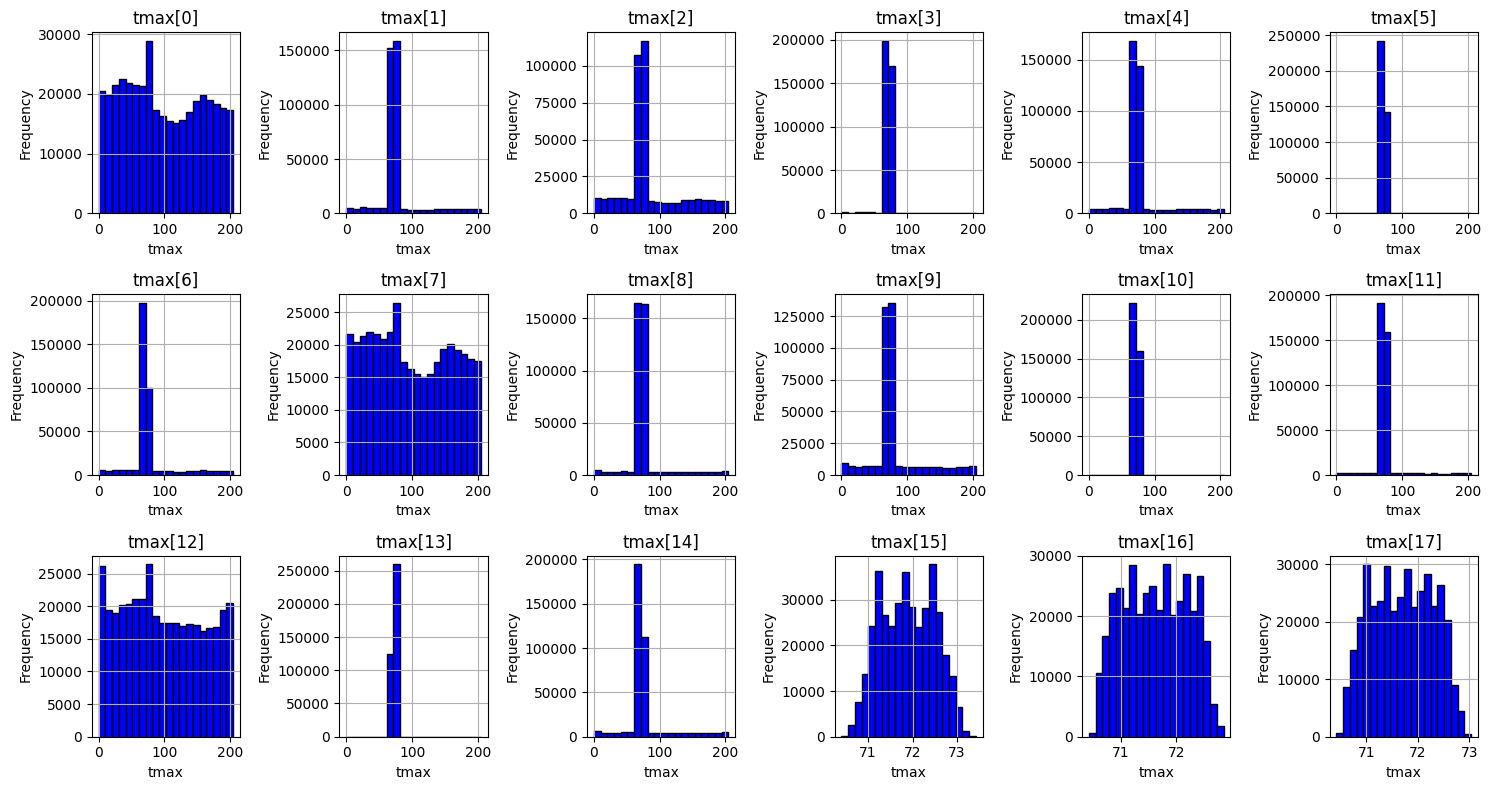

In [13]:
# TMAX DISTRIBUTION

fig, axes = plt.subplots(3, 6, figsize=(15, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(df_dev[f'tmax[{i}]'], bins=20, color='blue', edgecolor='black')
    ax.set_title(f'tmax[{i}]')
    ax.set_xlabel('tmax')
    ax.set_ylabel('Frequency')
    ax.grid()

plt.tight_layout()
plt.show()

#fig.savefig("Figure3.pdf", bbox_inches='tight')

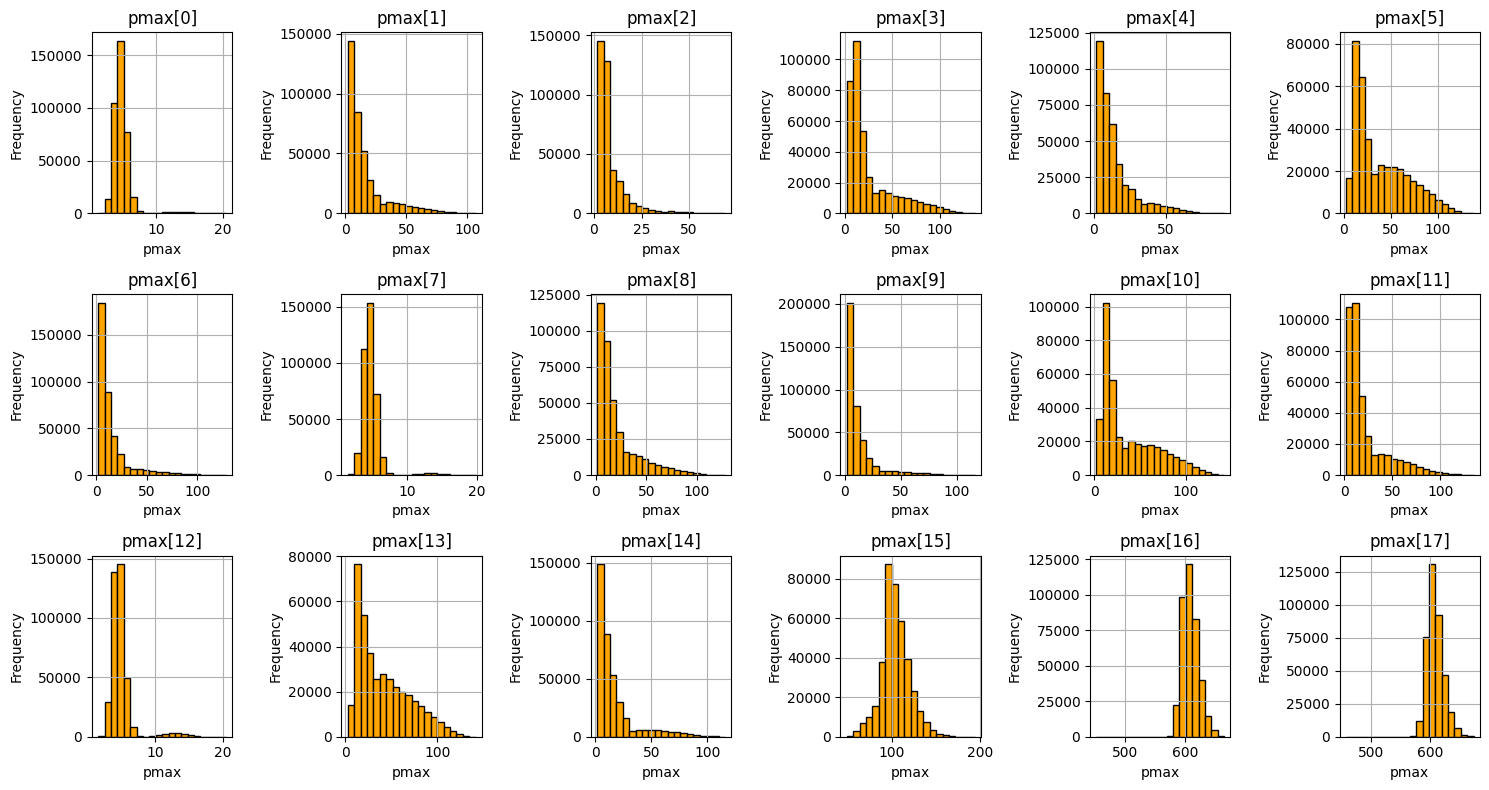

In [15]:
# PMAX DISTRIBUTION

fig, axes = plt.subplots(3, 6, figsize=(15, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.hist(df_dev[f'pmax[{i}]'], bins=20, color='orange', edgecolor='black')
    ax.set_title(f'pmax[{i}]')
    ax.set_xlabel('pmax')
    ax.set_ylabel('Frequency')
    ax.grid()

plt.tight_layout()
plt.show()

#fig.savefig("Figure3.pdf", bbox_inches='tight')


### Preparing the dataset for the model

In [3]:
# REMOVE COLUMNS
columns_to_drop = ['pmax[0]', 'negpmax[0]', 'area[0]', 'rms[0]', 'tmax[0]',
                   'pmax[7]', 'negpmax[7]', 'area[7]', 'rms[7]', 'tmax[7]', 
                   'pmax[12]', 'negpmax[12]', 'area[12]', 'rms[12]', 'tmax[12]', 
                   'pmax[15]', 'negpmax[15]', 'area[15]', 'rms[15]', 'tmax[15]',
                   'pmax[16]', 'negpmax[16]', 'area[16]', 'rms[16]', 'tmax[16]', 
                   'pmax[17]', 'negpmax[17]', 'area[17]', 'rms[17]', 'tmax[17]']

#if want to remove also the 'area' features
#columns_to_drop = columns_to_drop + ['area[1]', 'area[2]', 'area[3]','area[4]', 'area[5]', 'area[6]', 'area[8]', 'area[9]', 'area[10]', 'area[11]', 'area[13]', 'area[14]']

df_dev.drop(columns=columns_to_drop, inplace=True)

display(df_dev)

# DIVIDE THE DATASET
X = df_dev.drop(['x', 'y'], axis=1)
y = df_dev[['x', 'y']]

display(X.shape)
display(y.shape)

,x,y,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
Id,,,,,,,,,,,,,,,,,,,,,
0,200.0,200.0,5.409161,-17.721210,4.538778,22.600000,1.563902,6.084506,-19.892543,3.132328,...,7.454877,-16.861163,4.191909,72.600000,1.184943,6.611877,-17.685799,4.884680,162.800000,1.284969
1,200.0,200.0,4.414289,-4.736827,3.720435,111.875058,1.228058,4.507257,-3.787175,3.267461,...,18.472514,-3.372324,16.620582,119.812512,1.578009,13.802252,-5.154840,8.758870,120.000000,1.093953
2,200.0,200.0,4.567191,-5.985437,3.490490,107.800000,1.015408,5.384155,-3.948853,2.929150,...,7.336668,-5.742383,11.792258,71.908212,1.333036,5.940039,-3.860550,5.340140,6.614830,1.183951
3,200.0,200.0,5.019058,-4.229949,6.786200,175.600000,1.350620,4.165598,-5.576041,1.544370,...,8.450671,-6.342114,4.496741,72.600000,1.945065,6.434910,-5.576315,15.789638,72.195420,1.738998
4,200.0,200.0,3.250262,-5.783587,2.449456,159.800000,0.759515,4.736023,-5.137939,4.211047,...,8.721952,-4.396436,9.127136,71.411535,1.513988,4.483080,-5.361823,3.366542,160.185705,1.323621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385495,600.0,595.0,49.819376,-26.266623,24.781403,71.000000,1.021450,55.651440,-29.947864,28.621582,...,19.454065,-7.531409,10.650762,71.400000,0.964490,5.842563,-4.147369,4.551567,71.200000,1.681396
385496,600.0,595.0,51.016495,-26.138474,27.090894,71.400000,1.570939,58.084024,-34.662131,28.435582,...,17.604636,-5.505725,12.827195,71.500314,1.632497,11.819031,-5.125480,4.505713,72.400000,1.227755
385497,600.0,595.0,46.661682,-30.943115,24.980347,71.200000,1.255832,61.840103,-35.670273,30.500351,...,20.783524,-6.318405,13.981320,71.600000,1.944626,10.120659,-3.479907,11.049597,71.373814,1.273724


(385500, 60)

(385500, 2)

### MODEL SELECTION

In [20]:
def euclidean_distance(u_test, u_pred):

    # Calculate squared differences
    distance = np.mean(np.sqrt(np.sum(np.square(u_test - u_pred), axis=1)))

    return distance

In [ ]:
def evaluate_model(X, y, model):
    # this line is necessary to display the Xgboost model, otherwise returns error
    X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]
    kf = KFold(n_splits=3, shuffle=True, random_state=42)

    mse_list = []
    r2_list = []
    euc_list = []
    time_list = []
    
    for train_idx, val_idx in  kf.split(X, y):
        X_train = X.iloc[train_idx]
        y_train = y.iloc[train_idx]
        X_test = X.iloc[val_idx]
        y_test = y.iloc[val_idx]
    
        X_train.columns = [str(col) for col in X_train.columns]
        X_test.columns = [str(col) for col in X_test.columns]

        # time
        start_time = time.time()
        model.fit(X_train, y_train)
        y_hat = model.predict(X_test)
        end_time = time.time()

        mse = mean_squared_error(y_test, y_hat)
        mse_list.append(mse)

        r2 = r2_score(y_test, y_hat)
        r2_list.append(r2)

        euc_dist = euclidean_distance(y_test, y_hat)
        #euc_dist = np.mean(np.linalg.norm(y_test - y_hat, axis=1))
        euc_list.append(euc_dist)

        computation_time = end_time - start_time
        time_list.append(computation_time)
        
    return max(mse_list), max(r2_list), max(euc_list), max(time_list)

models = [
    LinearRegression(),
    Ridge(random_state=42),
    RandomForestRegressor(random_state=42),
    KNeighborsRegressor(),
    xgb.XGBRegressor(random_state=42) 
]

names = ['LinReg','Ridge','RanForest', 'KN', 'XGBoost']


t = PrettyTable()
t.field_names = ['Model', 'MSE', 'R2', 'Euclidean', 'Time']
for model, name in zip(models, names):
    mse, r2, euclidean, comp_time = evaluate_model(X, y, model)
    t.add_row([name, mse, r2, euclidean, comp_time])

display(t)

### HYPERPARAMETERS TUNING

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, shuffle=True, random_state=42)

#### First Grid Search

In [ ]:
param_grid = {
    'max_depth': [6, 9, 10],
    'min_child_weight': [1, 10, 100],
    'learning_rate': [0.15]
}

xgb_model = xgb.XGBRegressor()

gs = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with the training set and use the validation set for early stopping
gs.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=50)

# BEST MODEL AND BEST PARAMETERS
best_params = gs.best_params_
best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
euc_dist = euclidean_distance(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set:", mse)
print("Euclidean distance on Test Set:", euc_dist)

#### Second Grid search

In [ ]:
param_grid = {
    'n_estimators': [1000, 1200, 1500],
    'max_depth': [9, 11, 12, 14, 15],
    'min_child_weight': [1, ],
    'learning_rate': [0.015, 0.02, 0.05, 0.1],
    'colsample_bytree': [ 0.5, 0.8, 1.0], 
    'subsample': [0.5, 0.8, 1.0]
}

xgb_model = xgb.XGBRegressor()

gs = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model with the training set and use the validation set for early stopping
gs.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=50)

# BEST MODEL AND BEST PARAMETERS
best_params = gs.best_params_
best_model = gs.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
euc_dist = euclidean_distance(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set:", mse)
print("Euclidean distance on Test Set:", euc_dist)

#### Randomized Grid Search

In [ ]:
param_dist = {
    'gamma': [0.1, 1, 5, 10],
    'n_estimators': [1000, 1500, 2000],
    'max_depth': [9, 12, 15],
    'min_child_weight': [1, 3, 5, 7, 10, 13, 18, 20],
    'learning_rate': [0.013, 0.015, 0.018, 0.02, 0.022, 0.025, 0.05],
    'colsample_bytree': [ 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

rs = RandomizedSearchCV(model=xgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

rs.fit(X_train, y_train, eval_metric='rmse', eval_set=[(X_test, y_test)], early_stopping_rounds=50)

print("Best Hyperparameters:", rs.best_params_)

# Get the best model
best_model = rs.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
euc_dist = euclidean_distance(y_test, y_pred)

print("Best Hyperparameters:", best_params)
print("Mean Squared Error on Test Set:", mse)
print("Euclidean distance on Test Set:", euc_dist)

### Plotting the predictions vs the actual data

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

for i in range(2):  
    axes[i].scatter(y_test[:, i], y_pred[:, i], c='crimson')
    axes[i].set_yscale('log')
    axes[i].set_xscale('log')

    p1 = max(np.max(y_pred[:, i]), np.max(y_test[:, i]))
    p2 = min(np.min(y_pred[:, i]), np.min(y_test[:, i]))
    axes[i].plot([p1, p2], [p1, p2], 'b-')
    axes[i].set_xlabel(f'True Values {i}', fontsize=15)
    axes[i].set_ylabel(f'Predictions {i}', fontsize=15)
    axes[i].axis('equal')

plt.tight_layout()
plt.show()

### EVALUATION

In [22]:
# PREPROCESSING FOR THE EVALUATION TEST

df_eval.drop(columns=columns_to_drop, inplace=True)

display(df_eval)

# FINAL MODEL

#final_model = xgb.XGBRegressor(learning_rate=0.02, max_depth=9, min_child_weight = 1, n_estimators=1500, colsample_bytree=0.5, subsample=1)
final_model = xgb.XGBRegressor(colsample_bytree=0.7, subsample=1.0, learning_rate=0.018, n_estimators= 1000, max_depth= 15, min_child_weight = 13, gamma=1.0)
final_model.fit(X.values, y.values)
y_eval = final_model.predict(df_eval.values)

# CONVERTION OF THE PREDICTIONS TO CSV FILE

predicted_values = ['|'.join(map('{:.1f}'.format, vector)) for vector in y_eval]

pd.DataFrame({'Id': df_eval.index, 'Predicted': predicted_values}).to_csv("output.csv", index=False, columns=['Id', 'Predicted'])

,pmax[1],negpmax[1],area[1],tmax[1],rms[1],pmax[2],negpmax[2],area[2],tmax[2],rms[2],...,pmax[13],negpmax[13],area[13],tmax[13],rms[13],pmax[14],negpmax[14],area[14],tmax[14],rms[14]
Id,,,,,,,,,,,,,,,,,,,,,
0,8.738040,-3.598874,5.554105,70.800000,0.729175,5.359271,-4.603192,3.547230,179.800000,1.220856,...,61.340985,-47.161761,28.716632,70.600000,0.775649,17.802664,-5.761484,8.623282,70.400000,1.150677
1,23.460358,-20.616669,17.998419,72.800000,1.258335,20.116995,-20.351328,11.315171,72.800000,1.023543,...,23.587567,-10.732013,14.635765,72.800000,2.101599,10.272607,-6.347998,6.507688,72.800000,2.503477
2,4.837952,-7.224267,3.289124,67.057395,0.793541,6.132150,-4.086172,3.578799,38.800000,1.486030,...,12.934276,-4.244329,11.301154,71.486437,0.938702,3.556735,-5.449399,3.488582,104.632916,1.042146
3,87.293692,-45.786813,38.422989,71.800000,0.733773,25.325571,-14.530936,10.306552,72.000000,1.978536,...,43.858466,-18.916254,22.661873,72.000000,1.647570,16.255322,-9.080371,9.713149,71.800000,0.915295
4,9.593125,-5.374179,7.767408,72.414459,1.572473,6.618451,-4.427225,3.765579,72.400000,1.066749,...,54.800885,-23.237872,32.614696,72.000000,1.258360,10.197021,-7.442810,7.130603,72.000000,1.256862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128495,9.327438,-3.704605,6.657654,71.400000,0.891158,4.763165,-4.856036,11.514778,49.200000,1.709285,...,54.351236,-27.172751,26.922277,71.400000,1.085946,22.433310,-9.949075,13.170802,71.200000,1.747292
128496,5.833882,-6.185739,4.184656,20.037256,1.422575,3.790421,-5.154848,4.475711,178.800000,1.192393,...,15.090143,-6.553778,8.782450,71.600000,1.425143,4.467065,-4.729529,2.264683,84.400000,1.617628
128497,19.402353,-8.160696,11.304202,70.800000,1.370319,17.555460,-8.818259,9.256798,70.600000,0.950879,...,23.518393,-9.069559,13.958058,70.800000,1.625532,4.901157,-4.210786,2.049936,66.800000,0.908640


### Evaluate model vs Naive solutions

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, shuffle=True, random_state=42)

model = xgb.XGBRegressor(colsample_bytree=0.7, subsample=1.0, learning_rate=0.018, n_estimators= 1000, max_depth= 15, min_child_weight = 13, gamma=1.0)
model.fit(X_train, y_train)

y_pred_model = model.predict(X_test)

# Random Regressor as a baseline
random_regressor = DummyRegressor(strategy='mean')
random_regressor.fit(X_train, y_train)
y_pred_random = random_regressor.predict(X_test)

# Performance metrics
mse_model = mean_squared_error(y_test, y_pred_model)
mse_random = mean_squared_error(y_test, y_pred_random)

# Compare metrics
print(f'Mean Squared Error (Model): {mse_model}')
print(f'Mean Squared Error (Random Regressor): {mse_random}')

Mean Squared Error (Model): 12.43834677585529
Mean Squared Error (Random Regressor): 13770.582278467067


### The initial Approach: Random Forest

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, shuffle=True, random_state=42)

param_dist = {
    'n_estimators': [200, 300, 500, 600],
    'max_features': ['sqrt'],
    'max_depth': [None, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4],
    'bootstrap': [True, False]
}

rs = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

rs.fit(X_train, y_train)

print("Best Hyperparameters:", rs.best_params_)

# Get the best model
best_model = rs.best_estimator_

y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

In [ ]:
# PREPROCESSING FOR THE EVALUATION TEST

df_eval.drop(columns=columns_to_drop, inplace=True)

display(df_eval)

final_model = RandomForestRegressor(max_depth=None, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=600)
final_model.fit(X.values, y.values)
y_eval = final_model.predict(df_eval.values)

# CONVERTION OF THE PREDICTIONS TO CSV FILE

predicted_values = ['|'.join(map('{:.1f}'.format, vector)) for vector in y_eval]

#pd.DataFrame({'Id': df_eval.index, 'Predicted': predicted_values}).to_csv("output.csv", index=False, columns=['Id', 'Predicted'])